In [1]:
# load data
from keras.datasets import cifar10

(train_x, train_y), (test_x, test_y) = cifar10.load_data()

images size:  (32, 32, 3)
frog


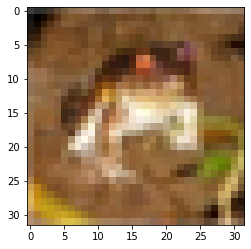

In [2]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('images size: ', train_x[0].shape)
plt.imshow(train_x[0])
print(class_names[train_y[0][0]])

In [3]:
from keras.utils import np_utils

# Converting to float type
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

# Standardizing
train_x /= 255
test_x /=  255 

# one hot
train_y = np_utils.to_categorical(train_y, 10)
test_y = np_utils.to_categorical(test_y, 10)

print(train_x.shape, train_y.shape)

(50000, 32, 32, 3) (50000, 10)


In [4]:
from keras import Sequential, layers

# Create sequential model
model = Sequential()

# Add layers
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Add layers
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

# Add layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [6]:
from keras.losses import categorical_crossentropy

# compile model
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [7]:
# fit model
from keras.callbacks import ModelCheckpoint


checkpoint_filepath = './model/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(train_x, train_y, batch_size=64, epochs=20, validation_split=0.1, callbacks=[model_checkpoint_callback])

Epoch 1/20
704/704 [==============================] - 99s 139ms/step - loss: 1.7425 - accuracy: 0.4091 - val_loss: 1.2922 - val_accuracy: 0.5402
Epoch 2/20
704/704 [==============================] - 103s 146ms/step - loss: 1.2193 - accuracy: 0.5649 - val_loss: 1.0789 - val_accuracy: 0.6136
Epoch 3/20
704/704 [==============================] - 103s 147ms/step - loss: 1.0605 - accuracy: 0.6243 - val_loss: 0.9287 - val_accuracy: 0.6714
Epoch 4/20
704/704 [==============================] - 103s 147ms/step - loss: 0.9656 - accuracy: 0.6628 - val_loss: 0.9482 - val_accuracy: 0.6530
Epoch 5/20
704/704 [==============================] - 104s 148ms/step - loss: 0.8970 - accuracy: 0.6846 - val_loss: 0.9228 - val_accuracy: 0.6696
Epoch 6/20
704/704 [==============================] - 102s 145ms/step - loss: 0.8471 - accuracy: 0.7035 - val_loss: 0.7769 - val_accuracy: 0.7266
Epoch 7/20
704/704 [==============================] - 105s 149ms/step - loss: 0.8038 - accuracy: 0.7193 - val_loss: 0.7558 - 

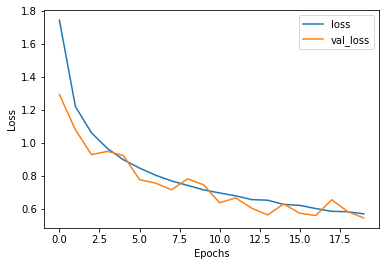

In [8]:
import matplotlib.pyplot as plt

losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

In [9]:
from numpy import argmax

test_loss = model.evaluate(test_x, test_y)
print("test loss: ", test_loss)

test_labels_p = model.predict(test_x)
test_labels_p = argmax(test_labels_p, axis=1)

313/313 [==============================] - 5s 16ms/step - loss: 0.5857 - accuracy: 0.8002
test loss:  [0.5856876373291016, 0.8001999855041504]


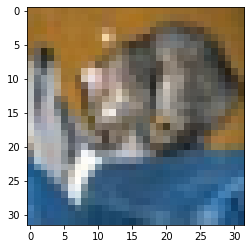

True labels:  cat
Pred labels:  cat


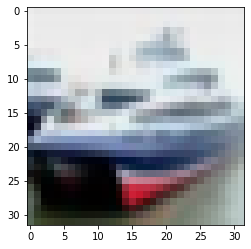

True labels:  ship
Pred labels:  ship


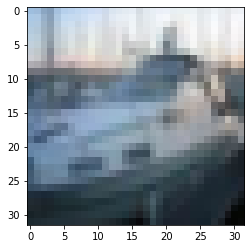

True labels:  ship
Pred labels:  ship


In [10]:
import matplotlib.pyplot as plt
from numpy import argmax

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(3):
  plt.imshow(test_x[i], cmap='gray')
  plt.show()
  print("True labels: ", class_names[argmax(test_y[i])])
  print("Pred labels: ", class_names[test_labels_p[i]])

In [11]:
model.save('model.h5')

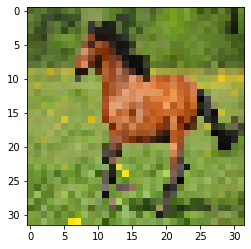

Horse


In [20]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from numpy import expand_dims


model = load_model('model.h5')

test_image1 = image.load_img('horse.jpg', target_size=(32, 32))

plt.imshow(test_image1)
plt.show()

test_image = image.img_to_array(test_image1) 
test_image = expand_dims(test_image, axis=0) 

result = model.predict(test_image) 

if result[0][0] == 1: 
    print("Airplane") 
elif result[0][1] == 1: 
    print('Automobile') 
elif result[0][2] == 1: 
    print('Bird') 
elif result[0][3] == 1: 
    print('Cat') 
elif result[0][4] == 1: 
    print('Deer') 
elif result[0][5] == 1: 
    print('Dog') 
elif result[0][6] == 1: 
    print('Frog') 
elif result[0][7] == 1: 
    print('Horse') 
elif result[0][8] == 1: 
    print('Ship') 
elif result[0][9] == 1: 
    print('Truck') 